<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Séries Temporais - Prática 2

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>

MBA em Ciência de Dados<br>
Universidade de Fortaleza

# **1. Análise do dataset 'DENGUE_MBA_ST.csv'**

## 1.1 Quantos casos de dengue há em cada ano para a cidade de Fortaleza?

## 1.2 Como os casos evoluíram no tempo?
- Crie gráficos que apresentem a evolução dos casos de dengue em Fortaleza ao longo do tempo.
- Adicione médias móveis (simples, centralizada e exponencial) nos gráficos para analisar a tendência.

## 1.3 O dado é estacionário?
- Verifique a estacionaridade do dado utilizando testes estatísticos, como o **KPSS**.
- Apresente a conclusão com base no p-valor do teste.

## 1.4 O dado apresenta uma distribuição normal?
- Utilize um teste estatístico, como o **Teste de Shapiro-Wilk**

## 1.5 Treinamento do modelo
- Escolha um período para treinar algum modelo de ML e faça a predição de algumas semanas posteriores.
- Crie um gráfico demonstrando o predição. Qual é a melhor forma de dividir o dado?

## 1.6 Para 2011, as séries temporais de casos de dengue entre bairros são semelhantes? Calcule a correlação entre os pares de bairros e verifique o valor médio.


### Observações:
- Para cada item, crie novas células para efetuar seus códigos.
- Nomear variáveis de acordo com o contexto da questão.
- Caso necessário, utilize novas caixas de textos para deixar comentários.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Casos de Dengue em Fortaleza

In [2]:
!gdown 1rcIgSC3rb-QlAYEGNWusPilA6yHDgcH5

Downloading...
From: https://drive.google.com/uc?id=1rcIgSC3rb-QlAYEGNWusPilA6yHDgcH5
To: /content/DENGUE_MBA_ST.csv
100% 144k/144k [00:00<00:00, 94.0MB/s]


In [3]:
df = pd.read_csv('DENGUE_MBA_ST.csv')

In [4]:
df.head()

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06


In [5]:
df['DATA'] = pd.to_datetime(df['DATA'])

In [6]:
df.columns

Index(['ANO', 'SEMANA_DO_ANO', 'AEROLANDIA', 'AEROPORTO', 'ALDEOTA',
       'ALTO DA BALANCA', 'ALVARO WEYNE', 'AMADEU FURTADO', 'ANCURI',
       'ANTONIO BEZERRA',
       ...
       'VICENTE PINZON', 'VILA ELLERY', 'VILA PERY', 'VILA UNIAO',
       'VILA VELHA', 'ALAGADICO', 'GENTILANDIA', 'MATA GALINHA',
       'PAN-AMERICANO', 'DATA'],
      dtype='object', length=122)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Columns: 122 entries, ANO to DATA
dtypes: datetime64[ns](1), float64(4), int64(117)
memory usage: 498.6 KB


In [8]:
# Escolhenado apenas os bairros
df.drop(['ANO','SEMANA_DO_ANO','DATA'], axis=1)

,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,ARRAIAL MOURA BRASIL,AUTRAN NUNES,...,VARJOTA,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO
0,0,0,1,0,0,0,3,0,0,0,...,0,1,0,1,0,2,0.0,0.0,0.0,0.0
1,0,0,0,0,1,0,1,0,1,0,...,0,1,1,5,1,4,0.0,0.0,0.0,0.0
2,0,0,2,1,1,0,7,1,4,0,...,1,6,0,6,4,2,0.0,0.0,0.0,0.0
3,0,0,0,0,2,0,2,0,1,1,...,0,6,2,8,1,0,0.0,0.0,0.0,0.0
4,0,0,0,1,4,0,2,0,2,0,...,1,6,2,2,5,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,0,0,1,0,2,0,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
519,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,2,0.0,0.0,0.0,0.0
520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0.0,0.0,0.0,0.0
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0.0,0.0,0.0


In [27]:
# capturando todos os nomes dos bairros
bairros = df.drop(['ANO','SEMANA_DO_ANO','DATA'], axis=1)
bairros

,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,ARRAIAL MOURA BRASIL,AUTRAN NUNES,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,CASOS
0,0,0,1,0,0,0,3,0,0,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,200.0
1,0,0,0,0,1,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,296.0
2,0,0,2,1,1,0,7,1,4,0,...,6,0,6,4,2,0.0,0.0,0.0,0.0,288.0
3,0,0,0,0,2,0,2,0,1,1,...,6,2,8,1,0,0.0,0.0,0.0,0.0,297.0
4,0,0,0,1,4,0,2,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,0,0,1,0,2,0,0,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,29.0
519,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,2,0.0,0.0,0.0,0.0,26.0
520,0,0,0,0,0,0,0,0,1,0,...,0,0,2,0,0,0.0,0.0,0.0,0.0,36.0
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,21.0


In [10]:
df['CASOS'] = df[bairros].sum(axis=1).values

In [12]:
# Pegando somente a coluna 'CASOS' e 'DATA' inserir bairros no df
Fortaleza = df[['DATA', 'CASOS']]
Fortaleza

,DATA,CASOS
0,2011-01-09,200.0
1,2011-01-16,296.0
2,2011-01-23,288.0
3,2011-01-30,297.0
4,2011-02-06,341.0
...,...,...
518,2020-12-06,29.0
519,2020-12-13,26.0
520,2020-12-20,36.0
521,2020-12-27,21.0


In [13]:
Fortaleza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATA    523 non-null    datetime64[ns]
 1   CASOS   523 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB


## 1.1 Quantos casos de dengue há em cada ano para a cidade de Fortaleza?

In [15]:
# Coluna Ano

df['ANO'] = df['DATA'].dt.year

# Agrupar os casos por ano
casos_por_ano = df.groupby('ANO')['CASOS'].sum().reset_index()

print("Quantidade de casos por ano:")
print(casos_por_ano)


Quantidade de casos por ano:
    ANO    CASOS
0  2011  33212.0
1  2012  37172.0
2  2013   8360.0
3  2014   4935.0
4  2015  26128.0
5  2016  21001.0
6  2017  13469.0
7  2018   1408.0
8  2019   3778.0
9  2020   7689.0


## 1.2 Como os casos evoluíram no tempo?

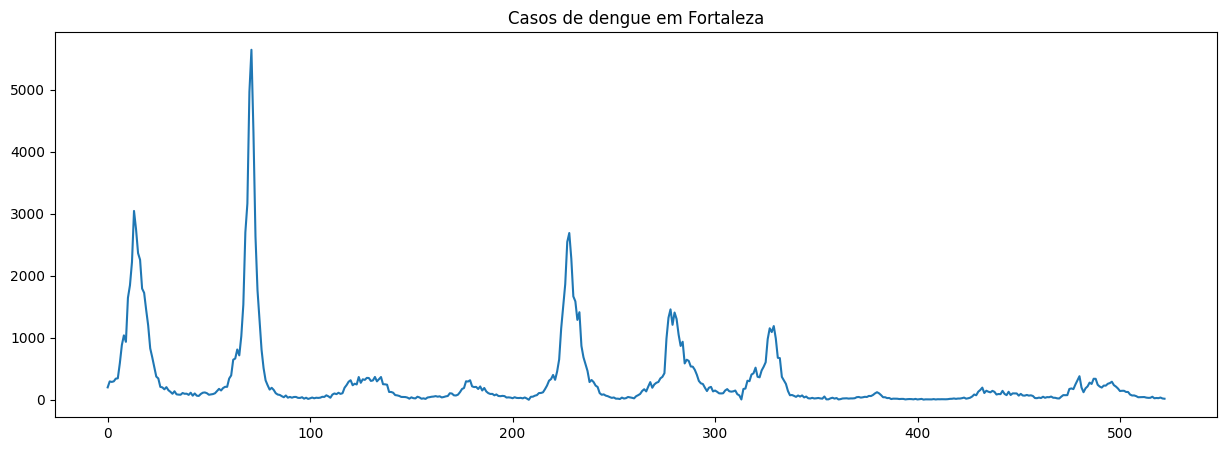

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(Fortaleza['CASOS'])
plt.title("Casos de dengue em Fortaleza")
plt.show()

### Médias Móveis


In [17]:
# Ordenar coluna data
Fortaleza = Fortaleza.sort_values(by='DATA')

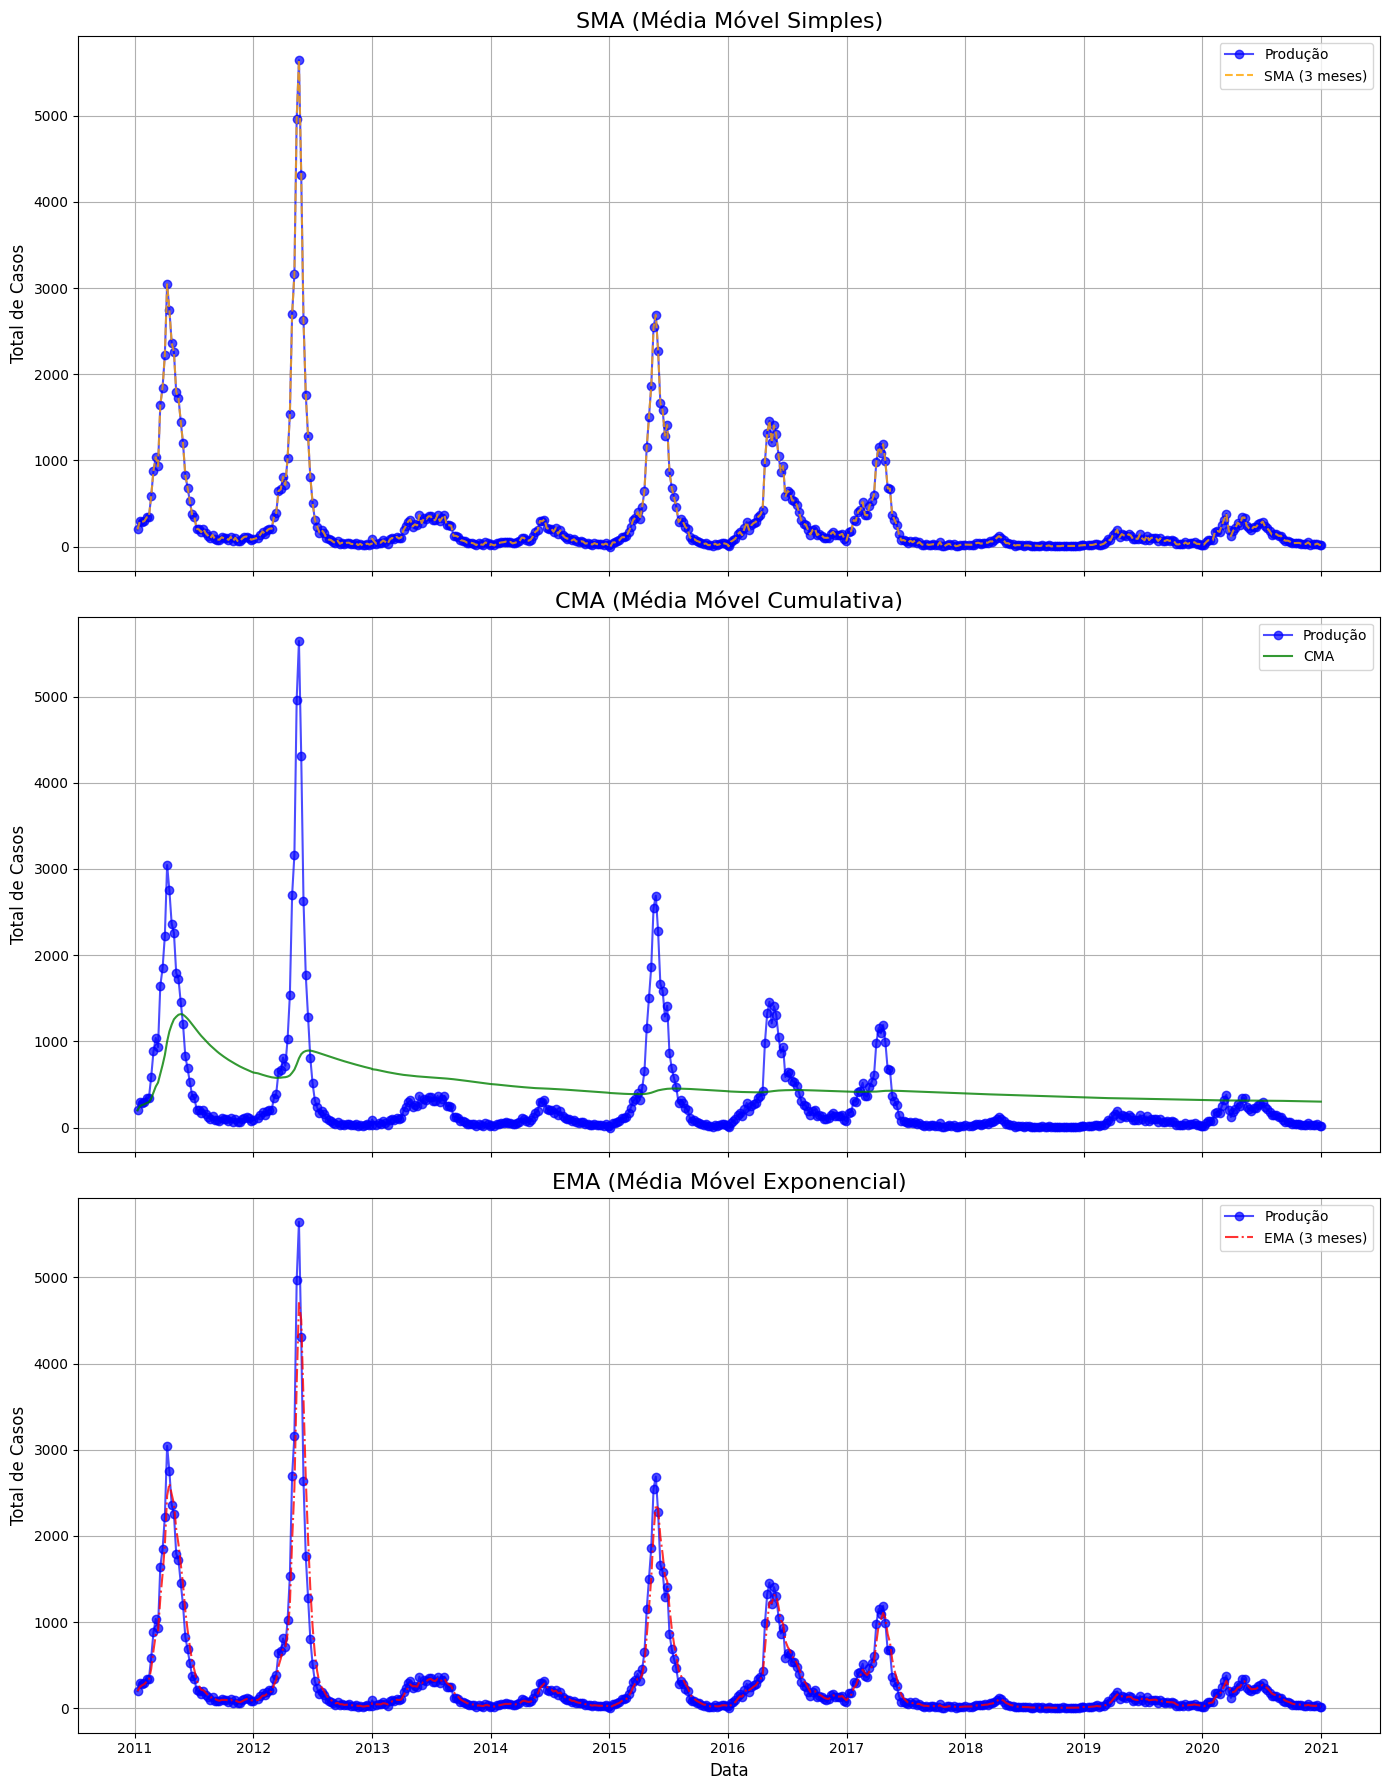

In [18]:
# Plotar médias móveis

# Calcular as médias móveis sobre os dados agregados
Fortaleza['SMA'] = Fortaleza['CASOS'].rolling(window=3).mean()
Fortaleza['CMA'] = Fortaleza['CASOS'].expanding().mean()
Fortaleza['EMA'] = Fortaleza['CASOS'].ewm(span=3, adjust=False).mean()

# Configurar subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plotar SMA
axes[0].plot(Fortaleza['DATA'], Fortaleza['CASOS'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[0].plot(Fortaleza['DATA'], Fortaleza['CASOS'], label='SMA (3 meses)', linestyle='--', color='orange', alpha=0.8)
axes[0].set_title('SMA (Média Móvel Simples)', fontsize=16)
axes[0].set_ylabel('Total de Casos', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Plotar CMA
axes[1].plot(Fortaleza['DATA'], Fortaleza['CASOS'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[1].plot(Fortaleza['DATA'], Fortaleza['CMA'], label='CMA', linestyle='-', color='green', alpha=0.8)
axes[1].set_title('CMA (Média Móvel Cumulativa)', fontsize=16)
axes[1].set_ylabel('Total de Casos', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Plotar EMA
axes[2].plot(Fortaleza['DATA'], Fortaleza['CASOS'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[2].plot(Fortaleza['DATA'], Fortaleza['EMA'], label='EMA (3 meses)', linestyle='-.', color='red', alpha=0.8)
axes[2].set_title('EMA (Média Móvel Exponencial)', fontsize=16)
axes[2].set_xlabel('Data', fontsize=12)
axes[2].set_ylabel('Total de Casos', fontsize=12)
axes[2].legend()
axes[2].grid(True)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


## Testes de Estacionaridade e Normalidade

Funções

In [19]:
import scipy.stats as stats
import statsmodels.tsa.stattools

In [20]:
# Estacionariedade

def teste_estacionaridade(x):
    kpss = statsmodels.tsa.stattools.kpss(x)
    valor_critico = kpss[3]['5%']
    teste = kpss[0]
    if teste <= valor_critico:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')


In [21]:
# Normalidade

def teste_normalidade(x):
    e, p = stats.shapiro(x)
    if p < 0.05:
        print('A distribuição NÃO é normal')
    else:
        print('A distribuição é normal')

In [22]:
teste_estacionaridade(Fortaleza['CASOS'])
teste_normalidade(Fortaleza['CASOS'])


A série NÃO é estacionária
A distribuição NÃO é normal


## 1.5  Treinamento do modelo


Dividi o dado para pegar o ano de 2019 até o último registro de 2020 para treinar e prever os próximos 6 meses

<ipython-input-34-7bfedcfc0796>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fortaleza_mes = fortaleza_2019_2020.resample('M', on='DATA').sum().reset_index()
<ipython-input-34-7bfedcfc0796>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=fortaleza_mes['DATA'].iloc[-1] + pd.offsets.MonthBegin(),


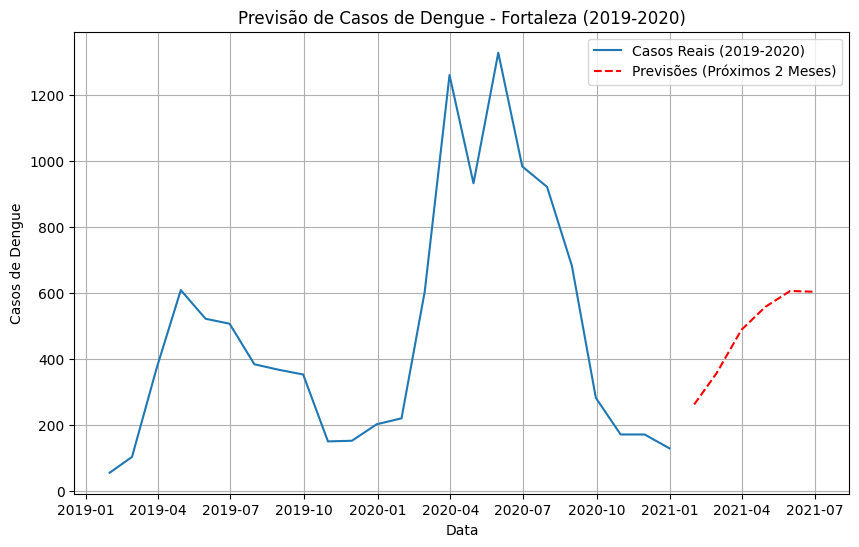

Previsões para os próximos 2 meses:
         DATA       CASOS
24 2021-01-31  262.178747
25 2021-02-28  357.010376
26 2021-03-31  488.350521
27 2021-04-30  558.167811
28 2021-05-31  606.406259
29 2021-06-30  603.886715


In [34]:
from statsmodels.tsa.ar_model import AutoReg


# Filtrar os dados de 2019 até 2020
fortaleza_2019_2020 = Fortaleza[(Fortaleza['DATA'] >= '2019-01-01') & (Fortaleza['DATA'] <= '2020-12-31')]

# Agregar os casos por mês (se os dados forem diários)
fortaleza_mes = fortaleza_2019_2020.resample('M', on='DATA').sum().reset_index()

# Verificar se há dados suficientes para modelagem
if len(fortaleza_mes) < 12:
    print("Os dados possuem menos de 12 registros mensais. Certifique-se de que os dados estão completos.")
else:
    # Separar a série temporal (apenas os valores de casos)
    casos = fortaleza_mes['CASOS']

    # Treinar o modelo de auto-regressão
    model = AutoReg(casos, lags=3)  # Usar 3 defasagens (pode ajustar)
    model_fit = model.fit()

    # Fazer previsões para os próximos 6 meses
    predictions = model_fit.predict(start=len(casos), end=len(casos)+5)

    # Adicionar as previsões ao dataframe
    future_dates = pd.date_range(start=fortaleza_mes['DATA'].iloc[-1] + pd.offsets.MonthBegin(),
                                 periods=6, freq='M')
    forecast = pd.DataFrame({'DATA': future_dates, 'CASOS': predictions})

    # Concatenar os dados reais com as previsões
    fortaleza_forecast = pd.concat([fortaleza_mes, forecast], ignore_index=True)

    # Visualizar os resultados
    plt.figure(figsize=(10, 6))
    plt.plot(fortaleza_mes['DATA'], fortaleza_mes['CASOS'], label="Casos Reais (2019-2020)")
    plt.plot(forecast['DATA'], forecast['CASOS'], label="Previsões (Próximos 2 Meses)", linestyle='--', color='red')
    plt.xlabel('Data')
    plt.ylabel('Casos de Dengue')
    plt.title('Previsão de Casos de Dengue - Fortaleza (2019-2020)')
    plt.legend()
    plt.grid()
    plt.show()

    # Exibir as previsões
    print("Previsões para os próximos 2 meses:")
    print(forecast)


## 1.6 - AUTOCORRELAÇÃO

In [28]:
bairros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Columns: 120 entries, AEROLANDIA to CASOS
dtypes: float64(5), int64(115)
memory usage: 490.4 KB


In [46]:
# Filtrar somente os registros do ano de 2011
fortaleza_2011 = df[df['DATA'].dt.year == 2011]

forteleza_corr = fortaleza_2011.drop(['ANO','SEMANA_DO_ANO','DATA','CASOS'], axis=1)


In [47]:

# Criar a matriz de correlação
correlation_matrix = forteleza_corr.corr(method='pearson')

# Resetar o índice para transformar a matriz em um dataframe de pares
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Bairro1', 'Bairro2', 'Correlação']

# Remover autovalores (mesmo bairro comparado consigo mesmo)
correlation_pairs = correlation_pairs[correlation_pairs['Bairro1'] != correlation_pairs['Bairro2']]

# Ordenar pelas correlações mais altas (em ordem decrescente)
top_correlations = correlation_pairs.sort_values(by='Correlação', ascending=False).drop_duplicates(subset=['Correlação']).head(5)

# Exibir os 5 pares com maior correlação
print("Top 5 pares de bairros com maiores correlações em 2011:")
print(top_correlations)


Top 5 pares de bairros com maiores correlações em 2011:
                 Bairro1        Bairro2  Correlação
11621  PRAIA DO FUTURO I  PADRE ANDRADE    1.000000
1983          BONSUCESSO         PAPICU    0.977308
1864          BOM JARDIM         PAPICU    0.971302
5667             GENIBAU       MONDUBIM    0.969683
1859          BOM JARDIM       MONDUBIM    0.969256
